In [ ]:
import numpy as np

# create RDF

In [ ]:


def calculate_rdf(coordinates, atom_types, dr, r_max):
    """
    Calculate the radial distribution function.

    Parameters:
    coordinates (numpy.ndarray): The coordinates of the particles.
    atom_types (numpy.ndarray): The type of each atom.
    dr (float): The width of the bins in the histogram.
    r_max (float): The maximum distance to consider in the RDF calculation.

    Returns:
    tuple: (g, r) where g is the RDF and r is the array of distance bins.
    """
    from scipy.spatial.distance import pdist, squareform

    # Number of particles
    N = len(coordinates)

    # Calculate the pairwise distances
    r = pdist(coordinates)

    # Only consider distances up to r_max
    r = r[r < r_max]

    # Generate the bins for the histogram
    bins = np.arange(0, r_max, dr)

    # Calculate the histogram
    hist, edges = np.histogram(r, bins=bins)

    # Normalize the RDF
    rho = N / (4/3 * np.pi * r_max**3)  # density
    r = edges[:-1] + dr/2  # positions of the bin centers
    ideal_hist = 4 * np.pi * rho * r**2 * dr  # ideal histogram for a uniform distribution
    g = hist / ideal_hist

    return g, r



    g, r = calculate_rdf(added_layers[:,1:], added_layers[:,0], .1, 5)
    import matplotlib.pyplot as plt
    # Plot the RDF
    plt.figure(figsize=(7, 5))
    plt.plot(r, g, label='g(r)')
    plt.title('Radial Distribution Function')
    plt.xlabel('Distance (r)')
    plt.ylabel('g(r)')
    plt.legend()
    plt.grid(True)
    plt.savefig(filename[:-4] + '.png')

# select all R1 even particle

In [ ]:
s = " || ".join(f"ParticleIdentifier == {i}" for i in range(15003, 15502, 2))
print(s)


# Bar plot


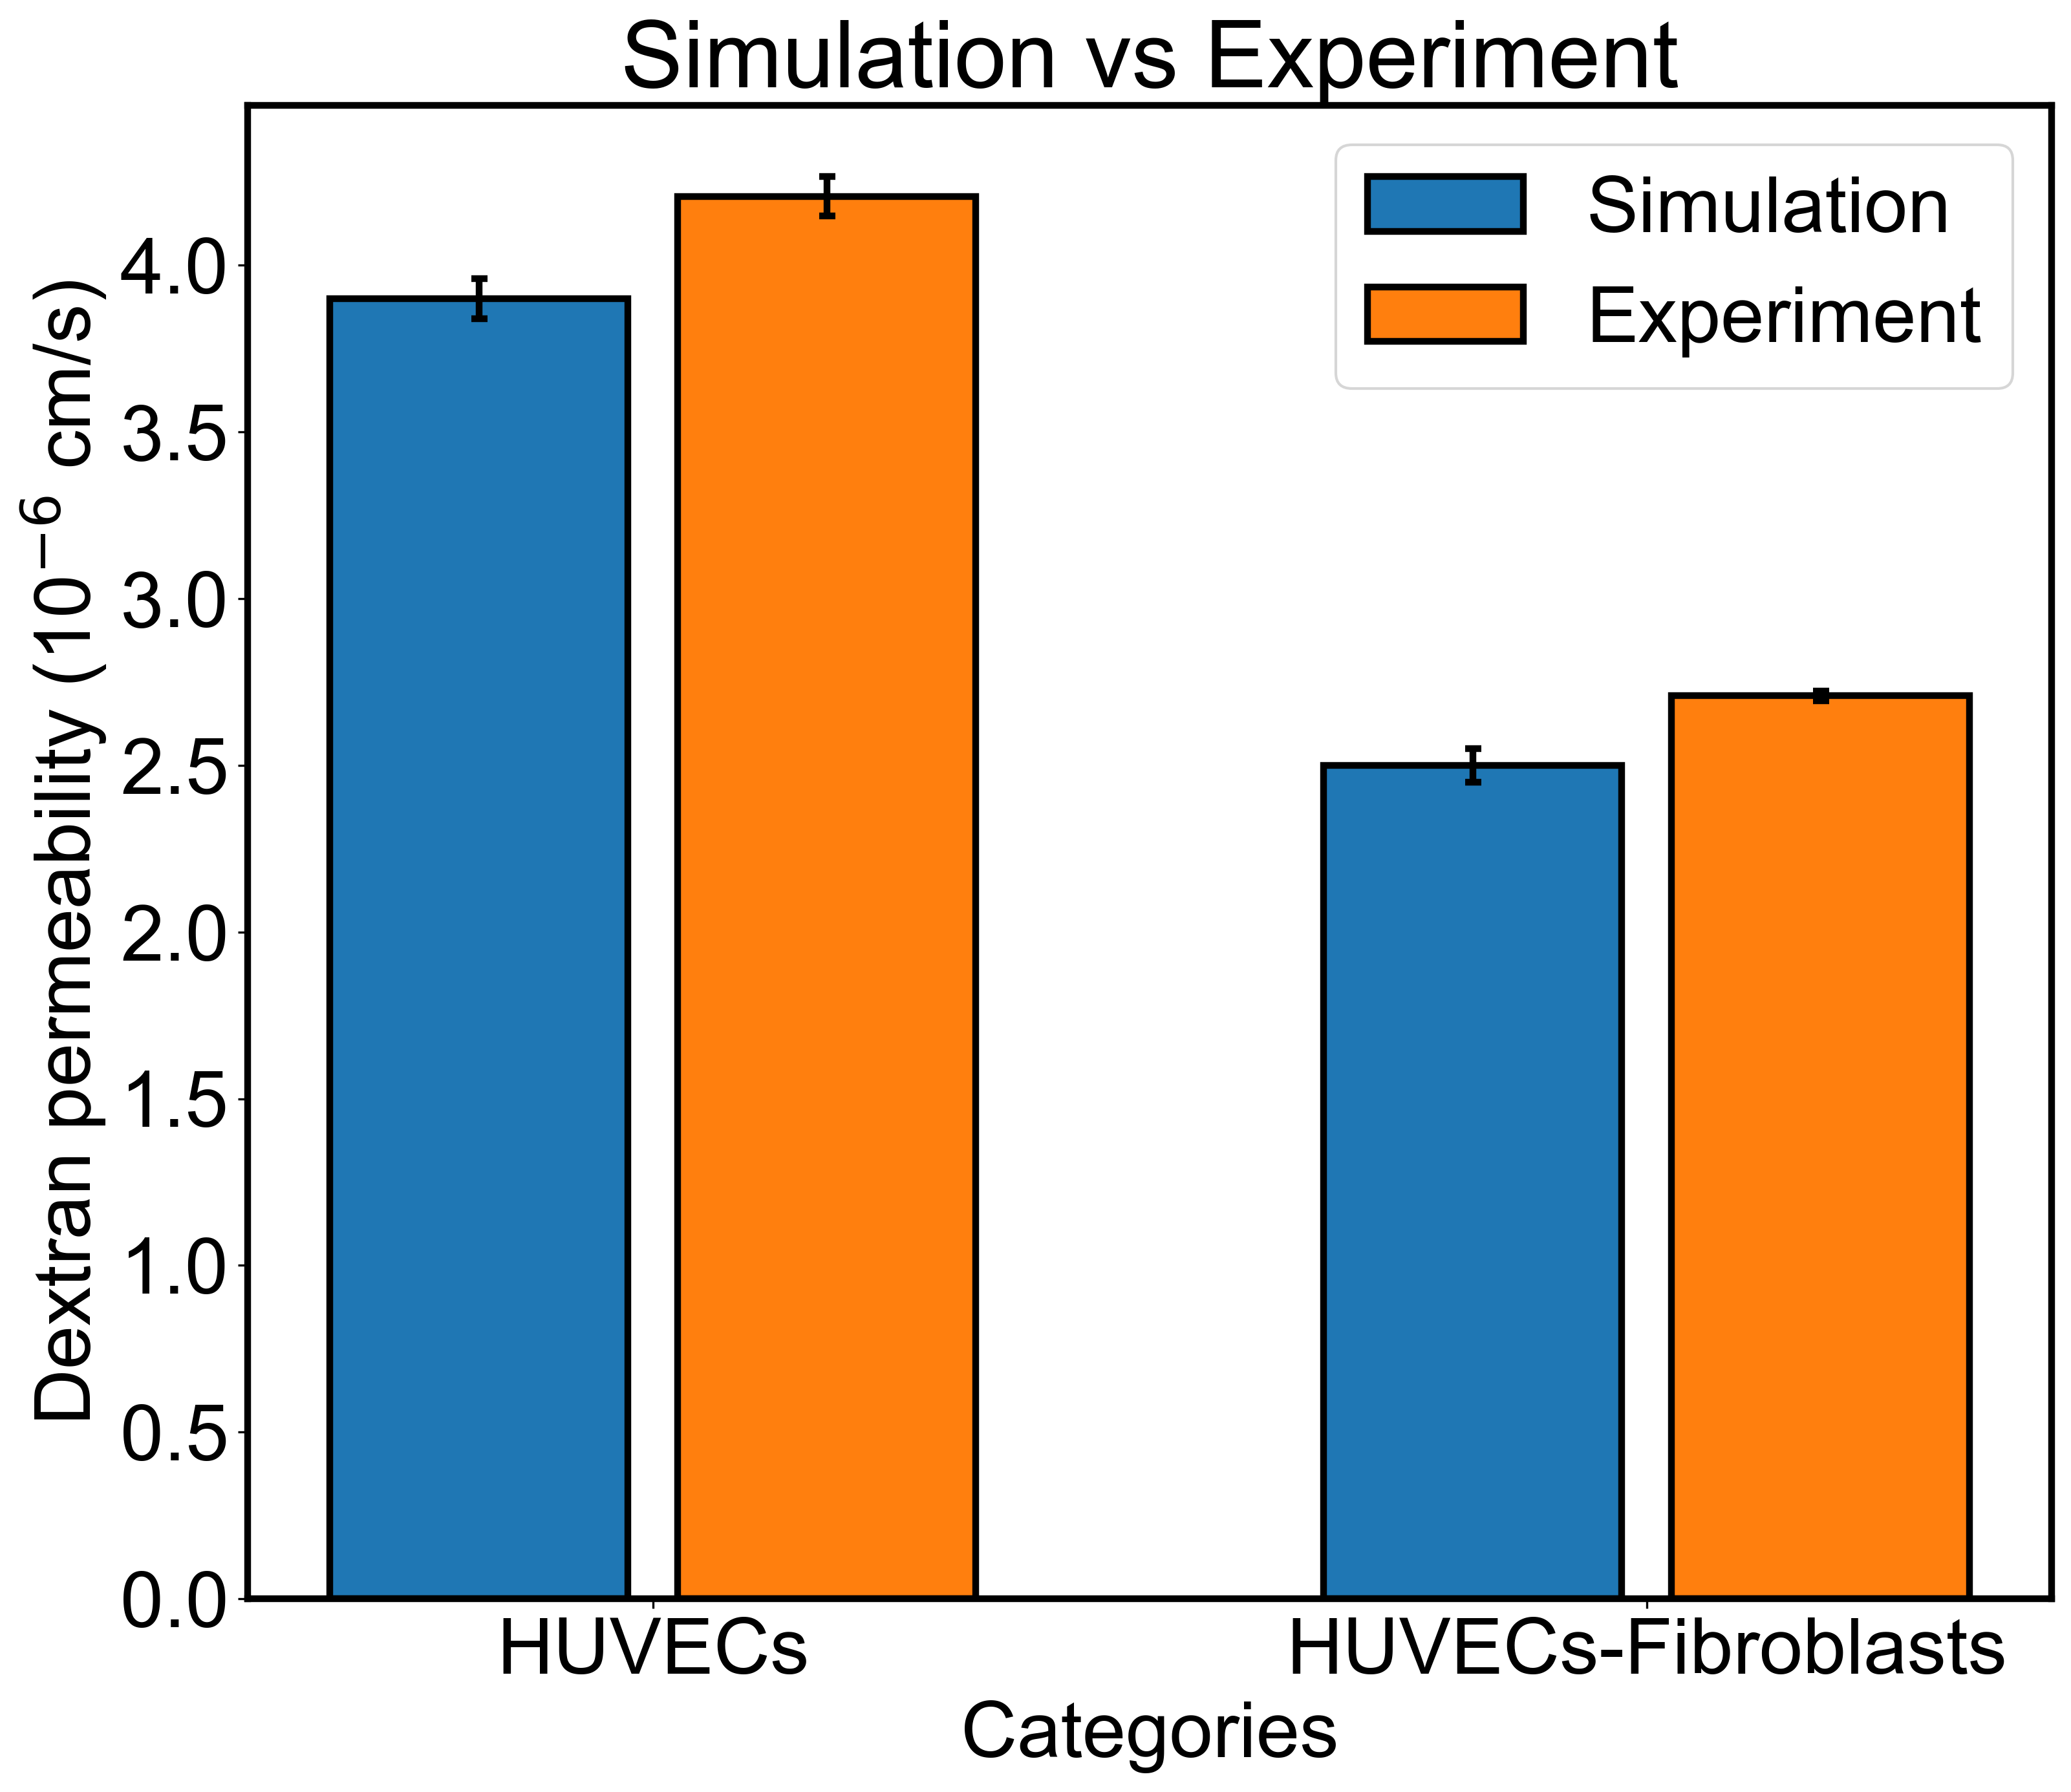

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Data for simulation and experiment
simulation_data = [3.9, 2.5]
simulation_error = [.06, .05 ]

experiment_data = [4.20688371884542, 2.70864933416729]
experiment_error = [0.0588422460873535, 0.0145489159231288]

# Width of error bars and bar borders
bar_width = 0.3
errorbar_width = 2.5
border_width = 2.5

# Positions of the bars
bar_positions = np.arange(len(simulation_data))
bar_offsets = 0.35  # Offset for the experiment bars

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12,10), dpi= 300)

# Plot the simulation data with error bars
ax.bar(bar_positions, simulation_data, yerr=simulation_error, width=bar_width,
       color='#1f77b4', edgecolor='black', linewidth=border_width, label='Simulation')
ax.errorbar(bar_positions, simulation_data, yerr=simulation_error, fmt='none', elinewidth=errorbar_width,
            capsize=3, color='black', capthick=border_width)

# Plot the experiment data with error bars
ax.bar(bar_positions + bar_offsets, experiment_data, yerr=experiment_error, width=bar_width,
       color='#ff7f0e', edgecolor='black', linewidth=border_width, label='Experiment')
ax.errorbar(bar_positions + bar_offsets, experiment_data, yerr=experiment_error, fmt='none', elinewidth=errorbar_width,
            capsize=3, color='black', capthick=border_width)

# Customize the plot
ax.set_xticks(bar_positions + bar_offsets/2)
ax.set_xticklabels(['HUVECs', 'HUVECs-Fibroblasts'])
ax.set_xlabel('Categories')
ax.set_ylabel('Dextran permeability (10$^{-6}$ cm/s)')
ax.set_title('Simulation vs Experiment')
ax.legend()

# figure property 
font_size=29
font = {'family' : 'Arial', 'size'   : font_size}
plt.rc('font', **font)
plt.rc('text', usetex=False)
plt.rcParams['axes.linewidth'] = 2.50


# Adjust the color saturation
ax.set_facecolor('w')  # Set the background color to white

# Save the figure
image_format = 'svg' # e.g .png, .svg, etc.
filename = 'Bar plot'
image_name = '{}.svg'.format(filename)
plt.savefig(image_name, format=image_format, dpi=300, bbox_inches='tight')